In [1]:
%matplotlib inline
%config Completer.use_jedi = False

import datetime
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

  Obtaining dependency information for yfinance==0.2.31 from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pytz>=2022.5 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached peewee-3.17.0.tar.gz (2.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.

In [4]:
import yfinance as yf

In [17]:
# yf.Ticker("EPAM")

In [56]:
def download_sp500_data(start_date, end_date, sp500_tickers, sector=None):
    # Create a directory to store the data
    data_directory = 'sp500_data'
    os.makedirs(data_directory, exist_ok=True)
    
    filtered_tickers = []

    # Download data for each ticker
    for ticker in sp500_tickers:
        try:
            if sector is not None:
                info = yf.Ticker(ticker).info
                if 'sector' in info and info['sector'] == sector:
                    filtered_tickers.append(ticker)
                    print(ticker)
                else:
                    continue
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            if not stock_data.empty:
                filename = os.path.join(data_directory, f"{ticker}.csv")
                stock_data.to_csv(filename)
                print(f"Data for {ticker} downloaded and saved to {filename}")
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")
    return filtered_tickers

In [17]:
yf.Tickers('^GSPC').tickers['^GSPC'].history().index.strftime('%Y-%m-%d')

Index(['2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16', '2023-10-17',
       '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
       '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31',
       '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06', '2023-11-07',
       '2023-11-08', '2023-11-09', '2023-11-10'],
      dtype='object', name='Date')

In [18]:
def get_sp500_tickers():
    # Fetch S&P 500 tickers from Wikipedia
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_table = pd.read_html(url)[0]
    sp500_tickers = sp500_table['Symbol'].tolist()
    return sp500_tickers

In [47]:
import ssl
import urllib.request

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

tickers = get_sp500_tickers()

In [48]:
tickers[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL']

In [57]:
start_date = datetime.datetime(2008, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Download data for all S&P 500 stocks
download_sp500_data(start_date, end_date, tickers)

[*********************100%%**********************]  1 of 1 completed
Data for MMM downloaded and saved to sp500_data/MMM.csv
[*********************100%%**********************]  1 of 1 completed
Data for AOS downloaded and saved to sp500_data/AOS.csv
[*********************100%%**********************]  1 of 1 completed
Data for ABT downloaded and saved to sp500_data/ABT.csv
[*********************100%%**********************]  1 of 1 completed
Data for ABBV downloaded and saved to sp500_data/ABBV.csv
[*********************100%%**********************]  1 of 1 completed
Data for ACN downloaded and saved to sp500_data/ACN.csv
[*********************100%%**********************]  1 of 1 completed
Data for ADM downloaded and saved to sp500_data/ADM.csv
[*********************100%%**********************]  1 of 1 completed
Data for ADBE downloaded and saved to sp500_data/ADBE.csv
[*********************100%%**********************]  1 of 1 completed
Data for ADP downloaded and saved to sp500_data/ADP.


1 Failed download:
['ABNB']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for APD downloaded and saved to sp500_data/APD.csv
[*********************100%%**********************]  1 of 1 completed
Data for AKAM downloaded and saved to sp500_data/AKAM.csv
[*********************100%%**********************]  1 of 1 completed
Data for ALK downloaded and saved to sp500_data/ALK.csv
[*********************100%%**********************]  1 of 1 completed
Data for ALB downloaded and saved to sp500_data/ALB.csv
[*********************100%%**********************]  1 of 1 completed
Data for ARE downloaded and saved to sp500_data/ARE.csv
[*********************100%%**********************]  1 of 1 completed
Data for ALGN downloaded and saved to sp500_data/ALGN.csv
[*********************100%%**********************]  1 of 1 completed
Data for ALLE downloaded and saved to sp500_data/ALLE.csv
[*********************100%%**********************]  1 of 1 completed
Data for LNT downloaded and saved to sp500_data/L


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
Data for BBY downloaded and saved to sp500_data/BBY.csv
[*********************100%%**********************]  1 of 1 completed
Data for BIO downloaded and saved to sp500_data/BIO.csv
[*********************100%%**********************]  1 of 1 completed
Data for TECH downloaded and saved to sp500_data/TECH.csv
[*********************100%%**********************]  1 of 1 completed
Data for BIIB downloaded and saved to sp500_data/BIIB.csv
[*********************100%%**********************]  1 of 1 completed
Data for BLK downloaded and saved to sp500_data/BLK.csv
[*********************100%%**********************]  1 of 1 completed
Data for BX downloaded and saved to sp500_data/BX.csv
[*********************100%%**********************]  1 of 1 completed
Data for BK downloaded and saved to sp500_data/BK.csv
[*********************100%%**********************]  1 of 1 completed
Data for BA downloaded and saved to sp500_data/BA.csv
[


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2008-01-01 00:00:00 -> 2016-12-31 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
Data for BG downloaded and saved to sp500_data/BG.csv
[*********************100%%**********************]  1 of 1 completed
Data for CHRW downloaded and saved to sp500_data/CHRW.csv
[*********************100%%**********************]  1 of 1 completed
Data for CDNS downloaded and saved to sp500_data/CDNS.csv
[*********************100%%**********************]  1 of 1 completed
Data for CZR downloaded and saved to sp500_data/CZR.csv
[*********************100%%**********************]  1 of 1 completed
Data for CPT downloaded and saved to sp500_data/CPT.csv
[*********************100%%**********************]  1 of 1 completed
Data for CPB downloaded and saved to sp500_data/CPB.csv
[*********************100%%**********************]  1 of 1 completed
Data for COF downloaded and saved to sp500_data/COF.csv
[*********************100%%**********************]  1 of 1 completed
Data for CAH downloaded and saved to sp500_data/CAH.c


1 Failed download:
['CARR']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for CTLT downloaded and saved to sp500_data/CTLT.csv
[*********************100%%**********************]  1 of 1 completed
Data for CAT downloaded and saved to sp500_data/CAT.csv
[*********************100%%**********************]  1 of 1 completed
Data for CBOE downloaded and saved to sp500_data/CBOE.csv
[*********************100%%**********************]  1 of 1 completed
Data for CBRE downloaded and saved to sp500_data/CBRE.csv
[*********************100%%**********************]  1 of 1 completed
Data for CDW downloaded and saved to sp500_data/CDW.csv
[*********************100%%**********************]  1 of 1 completed
Data for CE downloaded and saved to sp500_data/CE.csv
[*********************100%%**********************]  1 of 1 completed
Data for COR downloaded and saved to sp500_data/COR.csv
[*********************100%%**********************]  1 of 1 completed
Data for CNC downloaded and saved to sp500_data/CNC


1 Failed download:
['CDAY']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for CF downloaded and saved to sp500_data/CF.csv
[*********************100%%**********************]  1 of 1 completed
Data for CRL downloaded and saved to sp500_data/CRL.csv
[*********************100%%**********************]  1 of 1 completed
Data for SCHW downloaded and saved to sp500_data/SCHW.csv
[*********************100%%**********************]  1 of 1 completed
Data for CHTR downloaded and saved to sp500_data/CHTR.csv
[*********************100%%**********************]  1 of 1 completed
Data for CVX downloaded and saved to sp500_data/CVX.csv
[*********************100%%**********************]  1 of 1 completed
Data for CMG downloaded and saved to sp500_data/CMG.csv
[*********************100%%**********************]  1 of 1 completed
Data for CB downloaded and saved to sp500_data/CB.csv
[*********************100%%**********************]  1 of 1 completed
Data for CHD downloaded and saved to sp500_data/CHD.csv


1 Failed download:
['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for COO downloaded and saved to sp500_data/COO.csv
[*********************100%%**********************]  1 of 1 completed
Data for CPRT downloaded and saved to sp500_data/CPRT.csv
[*********************100%%**********************]  1 of 1 completed
Data for GLW downloaded and saved to sp500_data/GLW.csv
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTVA']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for CSGP downloaded and saved to sp500_data/CSGP.csv
[*********************100%%**********************]  1 of 1 completed
Data for COST downloaded and saved to sp500_data/COST.csv
[*********************100%%**********************]  1 of 1 completed
Data for CTRA downloaded and saved to sp500_data/CTRA.csv
[*********************100%%**********************]  1 of 1 completed
Data for CCI downloaded and saved to sp500_data/CCI.csv
[*********************100%%**********************]  1 of 1 completed
Data for CSX downloaded and saved to sp500_data/CSX.csv
[*********************100%%**********************]  1 of 1 completed
Data for CMI downloaded and saved to sp500_data/CMI.csv
[*********************100%%**********************]  1 of 1 completed
Data for CVS downloaded and saved to sp500_data/CVS.csv
[*********************100%%**********************]  1 of 1 completed
Data for DHI downloaded and saved to sp500_data/D


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for DTE downloaded and saved to sp500_data/DTE.csv
[*********************100%%**********************]  1 of 1 completed
Data for DUK downloaded and saved to sp500_data/DUK.csv
[*********************100%%**********************]  1 of 1 completed
Data for DD downloaded and saved to sp500_data/DD.csv
[*********************100%%**********************]  1 of 1 completed
Data for EMN downloaded and saved to sp500_data/EMN.csv
[*********************100%%**********************]  1 of 1 completed
Data for ETN downloaded and saved to sp500_data/ETN.csv
[*********************100%%**********************]  1 of 1 completed
Data for EBAY downloaded and saved to sp500_data/EBAY.csv
[*********************100%%**********************]  1 of 1 completed
Data for ECL downloaded and saved to sp500_data/ECL.csv
[*********************100%%**********************]  1 of 1 completed
Data for EIX downloaded and saved to sp500_data/EIX.csv


1 Failed download:
['FOXA']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FOX']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for BEN downloaded and saved to sp500_data/BEN.csv
[*********************100%%**********************]  1 of 1 completed
Data for FCX downloaded and saved to sp500_data/FCX.csv
[*********************100%%**********************]  1 of 1 completed
Data for GRMN downloaded and saved to sp500_data/GRMN.csv
[*********************100%%**********************]  1 of 1 completed
Data for IT downloaded and saved to sp500_data/IT.csv
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for GEN downloaded and saved to sp500_data/GEN.csv
[*********************100%%**********************]  1 of 1 completed
Data for GNRC downloaded and saved to sp500_data/GNRC.csv
[*********************100%%**********************]  1 of 1 completed
Data for GD downloaded and saved to sp500_data/GD.csv
[*********************100%%**********************]  1 of 1 completed
Data for GE downloaded and saved to sp500_data/GE.csv
[*********************100%%**********************]  1 of 1 completed
Data for GIS downloaded and saved to sp500_data/GIS.csv
[*********************100%%**********************]  1 of 1 completed
Data for GM downloaded and saved to sp500_data/GM.csv
[*********************100%%**********************]  1 of 1 completed
Data for GPC downloaded and saved to sp500_data/GPC.csv
[*********************100%%**********************]  1 of 1 completed
Data for GILD downloaded and saved to sp500_data/GILD.csv
[


1 Failed download:
['IR']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for PODD downloaded and saved to sp500_data/PODD.csv
[*********************100%%**********************]  1 of 1 completed
Data for INTC downloaded and saved to sp500_data/INTC.csv
[*********************100%%**********************]  1 of 1 completed
Data for ICE downloaded and saved to sp500_data/ICE.csv
[*********************100%%**********************]  1 of 1 completed
Data for IFF downloaded and saved to sp500_data/IFF.csv
[*********************100%%**********************]  1 of 1 completed
Data for IP downloaded and saved to sp500_data/IP.csv
[*********************100%%**********************]  1 of 1 completed
Data for IPG downloaded and saved to sp500_data/IPG.csv
[*********************100%%**********************]  1 of 1 completed
Data for INTU downloaded and saved to sp500_data/INTU.csv
[*********************100%%**********************]  1 of 1 completed
Data for ISRG downloaded and saved to sp500_data/IS


1 Failed download:
['INVH']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for IQV downloaded and saved to sp500_data/IQV.csv
[*********************100%%**********************]  1 of 1 completed
Data for IRM downloaded and saved to sp500_data/IRM.csv
[*********************100%%**********************]  1 of 1 completed
Data for JBHT downloaded and saved to sp500_data/JBHT.csv
[*********************100%%**********************]  1 of 1 completed
Data for JKHY downloaded and saved to sp500_data/JKHY.csv
[*********************100%%**********************]  1 of 1 completed
Data for J downloaded and saved to sp500_data/J.csv
[*********************100%%**********************]  1 of 1 completed
Data for JNJ downloaded and saved to sp500_data/JNJ.csv
[*********************100%%**********************]  1 of 1 completed
Data for JCI downloaded and saved to sp500_data/JCI.csv
[*********************100%%**********************]  1 of 1 completed
Data for JPM downloaded and saved to sp500_data/JPM.csv


1 Failed download:
['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for KDP downloaded and saved to sp500_data/KDP.csv
[*********************100%%**********************]  1 of 1 completed
Data for KEY downloaded and saved to sp500_data/KEY.csv
[*********************100%%**********************]  1 of 1 completed
Data for KEYS downloaded and saved to sp500_data/KEYS.csv
[*********************100%%**********************]  1 of 1 completed
Data for KMB downloaded and saved to sp500_data/KMB.csv
[*********************100%%**********************]  1 of 1 completed
Data for KIM downloaded and saved to sp500_data/KIM.csv
[*********************100%%**********************]  1 of 1 completed
Data for KMI downloaded and saved to sp500_data/KMI.csv
[*********************100%%**********************]  1 of 1 completed
Data for KLAC downloaded and saved to sp500_data/KLAC.csv
[*********************100%%**********************]  1 of 1 completed
Data for KHC downloaded and saved to sp500_data/KHC


1 Failed download:
['MRNA']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for MHK downloaded and saved to sp500_data/MHK.csv
[*********************100%%**********************]  1 of 1 completed
Data for MOH downloaded and saved to sp500_data/MOH.csv
[*********************100%%**********************]  1 of 1 completed
Data for TAP downloaded and saved to sp500_data/TAP.csv
[*********************100%%**********************]  1 of 1 completed
Data for MDLZ downloaded and saved to sp500_data/MDLZ.csv
[*********************100%%**********************]  1 of 1 completed
Data for MPWR downloaded and saved to sp500_data/MPWR.csv
[*********************100%%**********************]  1 of 1 completed
Data for MNST downloaded and saved to sp500_data/MNST.csv
[*********************100%%**********************]  1 of 1 completed
Data for MCO downloaded and saved to sp500_data/MCO.csv
[*********************100%%**********************]  1 of 1 completed
Data for MS downloaded and saved to sp500_data/MS


1 Failed download:
['OTIS']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for PCAR downloaded and saved to sp500_data/PCAR.csv
[*********************100%%**********************]  1 of 1 completed
Data for PKG downloaded and saved to sp500_data/PKG.csv
[*********************100%%**********************]  1 of 1 completed
Data for PANW downloaded and saved to sp500_data/PANW.csv
[*********************100%%**********************]  1 of 1 completed
Data for PARA downloaded and saved to sp500_data/PARA.csv
[*********************100%%**********************]  1 of 1 completed
Data for PH downloaded and saved to sp500_data/PH.csv
[*********************100%%**********************]  1 of 1 completed
Data for PAYX downloaded and saved to sp500_data/PAYX.csv
[*********************100%%**********************]  1 of 1 completed
Data for PAYC downloaded and saved to sp500_data/PAYC.csv
[*********************100%%**********************]  1 of 1 completed
Data for PYPL downloaded and saved to sp500_dat


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for VRSN downloaded and saved to sp500_data/VRSN.csv
[*********************100%%**********************]  1 of 1 completed
Data for VRSK downloaded and saved to sp500_data/VRSK.csv
[*********************100%%**********************]  1 of 1 completed
Data for VZ downloaded and saved to sp500_data/VZ.csv
[*********************100%%**********************]  1 of 1 completed
Data for VRTX downloaded and saved to sp500_data/VRTX.csv
[*********************100%%**********************]  1 of 1 completed
Data for VFC downloaded and saved to sp500_data/VFC.csv
[*********************100%%**********************]  1 of 1 completed
Data for VTRS downloaded and saved to sp500_data/VTRS.csv
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VICI']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1483160400")



[*********************100%%**********************]  1 of 1 completed
Data for V downloaded and saved to sp500_data/V.csv
[*********************100%%**********************]  1 of 1 completed
Data for VMC downloaded and saved to sp500_data/VMC.csv
[*********************100%%**********************]  1 of 1 completed
Data for WAB downloaded and saved to sp500_data/WAB.csv
[*********************100%%**********************]  1 of 1 completed
Data for WBA downloaded and saved to sp500_data/WBA.csv
[*********************100%%**********************]  1 of 1 completed
Data for WMT downloaded and saved to sp500_data/WMT.csv
[*********************100%%**********************]  1 of 1 completed
Data for WBD downloaded and saved to sp500_data/WBD.csv
[*********************100%%**********************]  1 of 1 completed
Data for WM downloaded and saved to sp500_data/WM.csv
[*********************100%%**********************]  1 of 1 completed
Data for WAT downloaded and saved to sp500_data/WAT.csv
[****

[]

In [30]:
abbv = pd.read_csv("/Users/sergmiller/Documents/my/junction2023/sp500_data/ABBV.csv")
abbv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,34.919998,35.400002,34.099998,35.119999,22.419830,13767900
1,2013-01-03,35.000000,35.000000,34.160000,34.830002,22.234705,16739300
2,2013-01-04,34.619999,34.889999,34.250000,34.389999,21.953815,21372100
3,2013-01-07,34.150002,35.450001,34.150002,34.459999,21.998503,17897100
4,2013-01-08,34.290001,34.639999,33.360001,33.709999,21.519724,17863300


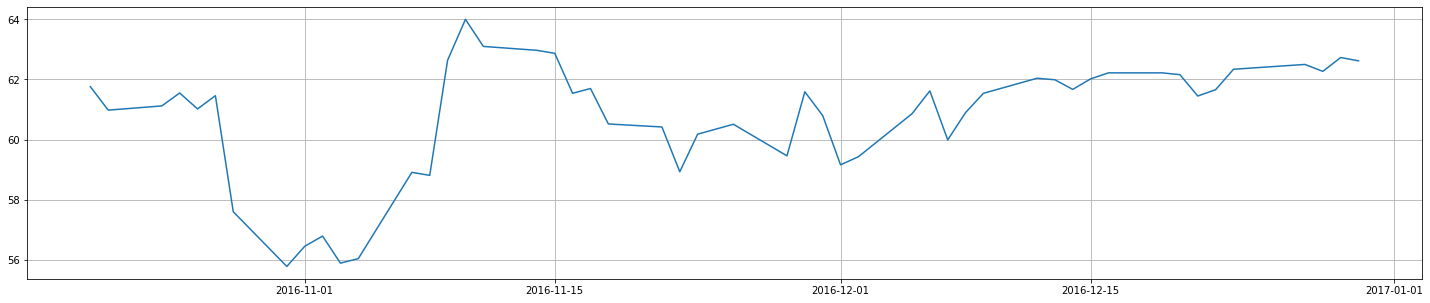

In [43]:
N = 50
k,v = abbv["Date"].values[-N:], abbv["Close"].values[-N:]
numeric_dates = matplotlib.dates.date2num(k)

# Plot the curve
plt.figure(figsize=(25,5))
plt.plot_date(numeric_dates, v, '-')
plt.grid(True)